### Connect to the database 

In [13]:
import mysql.connector

In [20]:
config = {
    'user': 'root',
    'host': '35.202.219.217',
    'database': 'moovie'
}

mydb = mysql.connector.connect(**config)

print(mydb)

In [21]:
db = mydb.cursor()

db.execute("CREATE TABLE test (name VARCHAR(255))")

In [29]:
db.execute("Insert INTO test (name) Value (%s)" % '"Scott"')
db.execute("SELECT * FROM test")

result = db.fetchall()

print(result)

[('Scott',), ('Scott',)]


### Data preprocessing

In [2]:
import pandas as pd

In [47]:
# have a look at the data format
df_iter = pd.read_csv("data.tsv", sep='\t', low_memory=False, chunksize=10000, dtype=str)
for df in df_iter:
    break
df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0071877,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0054452,tt0056404,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0077975,tt0080455,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0069467,tt0060827,tt0050976"


In [59]:
def parseData(data):
    '''
    Arguments:
        data: A DataFrame loaded from data.tsv
    Returns:
        The processed data, nconst, birthYear, deathYear values should become integers
    '''
    for i in data.index:
        data.at[i, 'nconst'] = int(data['nconst'][i].replace('nm', '').lstrip('0'))
        data.at[i, 'birthYear'] = 0 if data['birthYear'][i] == '\\N' else int(data['birthYear'][i])
        data.at[i, 'deathYear'] = 0 if data['deathYear'][i] == '\\N' else int(data['deathYear'][i])
    return data

def getActors(data):
    mask = data['primaryProfession'].str.contains('actor') | data['primaryProfession'].str.contains('actress')
    return data[mask.fillna(False)]

def getDirectors(data):
    mask = data['primaryProfession'].str.contains('director')
    return data[mask.fillna(False)]

In [61]:
def processActors(actors, acted_in, actors_df):
    for _, i in actors_df.iterrows():
        # add data to actors list
        actors.append([i['nconst'], i['primaryName'], i['birthYear'], i['deathYear']])
        
        # split on each movies
        for title in i['knownForTitles'].split(','):
            if title == '\\N':
                break
            title = int(title.replace('tt', '').lstrip('0'))
            
            # add data to acted_in list
            acted_in.append([i['nconst'], title])

def processDirectors(directors, directors_df):
    for _, i in directors_df.iterrows():
        # add data to directors list
        directors.append([i['nconst'], i['primaryName'], i['birthYear'], i['deathYear']])

In [69]:
df_iter = pd.read_csv("data.tsv", sep='\t', low_memory=False, chunksize=200000, dtype=str)
header = True
actors_col = ['actorId', 'actorName', 'birthyear', 'deathyear']
acted_in_col = ['movieId', 'actorId']
directors_col = ['directorId', 'directorName', 'birthyear', 'deathyear']
count = 0

for df in df_iter:
    actors = []
    directors = []
    acted_in = []

    df = parseData(df)
    actors_df = getActors(df)
    directors_df = getDirectors(df)

    processActors(actors, acted_in, actors_df)
    processDirectors(directors, directors_df)
    
    actors = pd.DataFrame(data=actors, columns=actors_col)
    directors = pd.DataFrame(data=directors, columns=directors_col)
    acted_in = pd.DataFrame(data=acted_in, columns=acted_in_col)

    actors.to_csv('temp_actors.csv', mode='a', header=header, index=False)
    directors.to_csv('temp_directors.csv', mode='a', header=header, index=False)
    acted_in.to_csv('temp_acted_in.csv', mode='a', header=header, index=False)

    header = False
    count += 1
    
    print('Finished ', count, '/55')

Finished  1 /55
Finished  2 /55
Finished  3 /55
Finished  4 /55
Finished  5 /55
Finished  6 /55
Finished  7 /55
Finished  8 /55
Finished  9 /55
Finished  10 /55
Finished  11 /55
Finished  12 /55
Finished  13 /55
Finished  14 /55
Finished  15 /55
Finished  16 /55
Finished  17 /55
Finished  18 /55
Finished  19 /55
Finished  20 /55
Finished  21 /55
Finished  22 /55
Finished  23 /55
Finished  24 /55
Finished  25 /55
Finished  26 /55
Finished  27 /55
Finished  28 /55
Finished  29 /55
Finished  30 /55
Finished  31 /55
Finished  32 /55
Finished  33 /55
Finished  34 /55
Finished  35 /55
Finished  36 /55
Finished  37 /55
Finished  38 /55
Finished  39 /55
Finished  40 /55
Finished  41 /55
Finished  42 /55
Finished  43 /55
Finished  44 /55
Finished  45 /55
Finished  46 /55
Finished  47 /55
Finished  48 /55
Finished  49 /55
Finished  50 /55
Finished  51 /55
Finished  52 /55
Finished  53 /55
Finished  54 /55
Finished  55 /55


In [70]:
df_iter = pd.read_csv("Directors.tsv", sep='\t', low_memory=False, chunksize=10000, dtype=str)
for df in df_iter:
    break
df.head(10)

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
5,tt0000006,nm0005690,\N
6,tt0000007,"nm0005690,nm0374658",\N
7,tt0000008,nm0005690,\N
8,tt0000009,nm0085156,nm0085156
9,tt0000010,nm0525910,\N


In [79]:
def get_id(content, rep):
    return int(content.replace(rep, '').lstrip('0'))

def process_directed_in(directed_in, directors_df):
    for _, i in directors_df.iterrows():
        if i['directors'] == '\\N':
            continue
        title_id = get_id(i['tconst'], 'tt')
        for director in i['directors'].split(','):
            directed_in.append([title_id, get_id(director, 'nm')])

In [82]:
df_iter = pd.read_csv("Directors.tsv", sep='\t', low_memory=False, chunksize=200000, dtype=str)
header = True
directed_in_col = ['movieId', 'directorId']
count = 0

for df in df_iter:
    df.drop('writers', axis=1)
    directed_in = []
    
    process_directed_in(directed_in, df)
    directed_in = pd.DataFrame(data=directed_in, columns=directed_in_col)
    directed_in.to_csv('temp_directed_in.csv', mode='a', header=header, index=False)
    
    count += 1
    header = False

    print('Finished ', count, '/39')

Finished  1 /39
Finished  2 /39
Finished  3 /39
Finished  4 /39
Finished  5 /39
Finished  6 /39
Finished  7 /39
Finished  8 /39
Finished  9 /39
Finished  10 /39
Finished  11 /39
Finished  12 /39
Finished  13 /39
Finished  14 /39
Finished  15 /39
Finished  16 /39
Finished  17 /39
Finished  18 /39
Finished  19 /39
Finished  20 /39
Finished  21 /39
Finished  22 /39
Finished  23 /39
Finished  24 /39
Finished  25 /39
Finished  26 /39
Finished  27 /39
Finished  28 /39
Finished  29 /39
Finished  30 /39
Finished  31 /39
Finished  32 /39
Finished  33 /39
Finished  34 /39
Finished  35 /39
Finished  36 /39
Finished  37 /39
Finished  38 /39
Finished  39 /39


In [83]:
df_iter = pd.read_csv("temp_actors.csv", chunksize=500, dtype=str)
for df in df_iter:
    break
print('Actors')
df.head(10)

Actors


,actorId,actorName,birthyear,deathyear
0,1,Fred Astaire,1899,1987
1,2,Lauren Bacall,1924,2014
2,3,Brigitte Bardot,1934,0
3,4,John Belushi,1949,1982
4,5,Ingmar Bergman,1918,2007
5,6,Ingrid Bergman,1915,1982
6,7,Humphrey Bogart,1899,1957
7,8,Marlon Brando,1924,2004
8,9,Richard Burton,1925,1984
9,10,James Cagney,1899,1986


In [84]:
df_iter = pd.read_csv("temp_acted_in.csv", chunksize=500, dtype=str)
for df in df_iter:
    break
print('Acted_in')
df.head(10)

Acted_in


,movieId,actorId
0,1,31983
1,1,50419
2,1,53137
3,1,72308
4,2,117057
5,2,37382
6,2,71877
7,2,38355
8,3,57345
9,3,54452


In [85]:
df_iter = pd.read_csv("temp_directors.csv", chunksize=500, dtype=str)
for df in df_iter:
    break
print('Directors')
df.head(10)

Directors


,directorId,directorName,birthyear,deathyear
0,5,Ingmar Bergman,1918,2007
1,8,Marlon Brando,1924,2004
2,10,James Cagney,1899,1986
3,19,Federico Fellini,1920,1993
4,24,John Gielgud,1904,2000
5,32,Charlton Heston,1923,2008
6,33,Alfred Hitchcock,1899,1980
7,36,Buster Keaton,1895,1966
8,37,Gene Kelly,1912,1996
9,40,Stanley Kubrick,1928,1999


In [86]:
df_iter = pd.read_csv("temp_directed_in.csv", chunksize=500, dtype=str)
for df in df_iter:
    break
print('Directed_in')
df.head(10)

Directed_in


,movieId,directorId
0,1,5690
1,2,721526
2,3,721526
3,4,721526
4,5,5690
5,6,5690
6,7,5690
7,7,374658
8,8,5690
9,9,85156


In [95]:
df_iter = pd.read_csv("Ratings.tsv", sep='\t', chunksize=100000, dtype=str)
for df in df_iter:
    break
print('Rating')
df.head(10)

Rating


,tconst,averageRating,numVotes
0,tt0000001,5.6,1690
1,tt0000002,6.0,210
2,tt0000003,6.5,1436
3,tt0000004,6.1,122
4,tt0000005,6.1,2234
5,tt0000006,5.3,123
6,tt0000007,5.4,684
7,tt0000008,5.4,1867
8,tt0000009,6.0,155
9,tt0000010,6.9,6254


In [104]:
def process_ratings_df(df):
    for i in df.index:
        df.at[i, 'numVotes'] = int(df['numVotes'][i])
        df.at[i, 'averageRating'] = float(df['averageRating'][i])
        df.at[i, 'tconst'] = int(df['tconst'][i].replace('tt', '').lstrip('0'))

<AxesSubplot:>

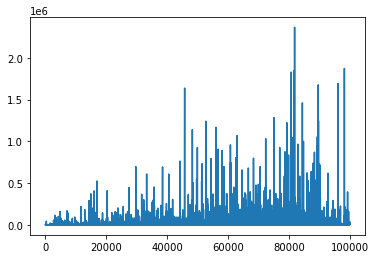

In [98]:
df['numVotes'].plot()

In [140]:
def process_ratings(ratings, ratings_df, review_count):
    for _, i in ratings_df.iterrows():
        num_vote = i['numVotes']
        
        # assign different superusers to ratings with different vote #
        if num_vote > 1e5:
            user_id = 1
        elif num_vote > 5e3:
            user_id = 2
        else:
            user_id = 3

        ratings.append([review_count, i['tconst'], user_id, i['averageRating'], 'N/A'])
        review_count += 1

In [143]:
df_iter = pd.read_csv("Ratings.tsv", sep='\t', low_memory=False, chunksize=100000, dtype=str)
header = True
ratings_col = ['reviewId', 'movieId', 'userId', 'rating', 'comment']
count = 0
review_count = 1

for df in df_iter:
    process_ratings_df(df)
    ratings = []
    
    process_ratings(ratings, df, review_count)
    ratings = pd.DataFrame(data=ratings, columns=ratings_col)
    ratings.to_csv('temp_ratings.csv', mode='a', header=header, index=False)
    
    count += 1
    header = False
    review_count += 100000

    print('Finished ', count, '/12')

Finished  1 /12
Finished  2 /12
Finished  3 /12
Finished  4 /12
Finished  5 /12
Finished  6 /12
Finished  7 /12
Finished  8 /12
Finished  9 /12
Finished  10 /12
Finished  11 /12
Finished  12 /12
